In [5]:
%matplotlib inline
import pandas as pd
from glassnode import GlassnodeClient
from fbprophet import Prophet



In [169]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [89]:
price = pd.read_csv("/Users/macbook/Documents/Ironhack/Week5/Project/bitcoin/glassnode-api-python-client-old/data/BTC-USD.csv")

In [90]:
price = price[["Date", "Close"]]

In [91]:
price

,Date,Close
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991
...,...,...
1785,2020-11-20,18621.314453
1786,2020-11-21,18642.232422
1787,2020-11-22,18370.001953
1788,2020-11-23,18364.121094


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


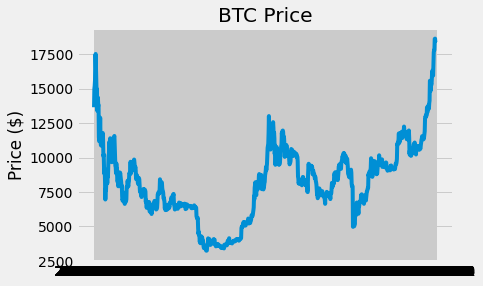

In [58]:
plt.plot( price['Date'], price['Close'])
plt.title('BTC Price')
plt.ylabel('Price ($)');
plt.show()

In [92]:
# Rename columns
price = price.rename(columns={'Date': 'ds', 'Close': 'y'})

In [60]:
price

,ds,y
0,2018-01-01,13657.200195
1,2018-01-02,14982.099609
2,2018-01-03,15201.000000
3,2018-01-04,15599.200195
4,2018-01-05,17429.500000
...,...,...
1053,2020-11-19,17817.089844
1054,2020-11-20,18621.314453
1055,2020-11-21,18642.232422
1056,2020-11-22,18370.001953


In [61]:
# Make the prophet model and fit on the data
price_prophet = Prophet(changepoint_prior_scale=0.15)


In [62]:
price_prophet.fit(price)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
price_prophet

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


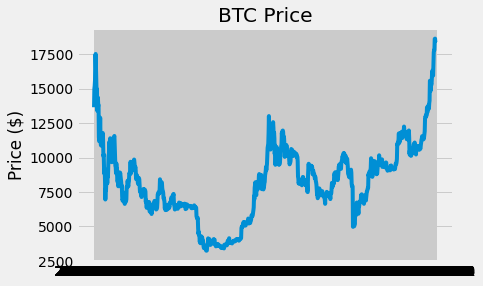

In [21]:
plt.plot(price['df'], price['y'])
plt.title('BTC Price')
plt.ylabel('Price ($)');
plt.show()

In [64]:
# Make a future dataframe for 2 years
price_future = price_prophet.make_future_dataframe(periods=365 * 2, freq='D')

In [65]:
price_future

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1783,2022-11-19
1784,2022-11-20
1785,2022-11-21
1786,2022-11-22


In [ ]:
# Review checkpoints!!!

In [66]:
# Make predictions
price_forecast = price_prophet.predict(price_future)

In [67]:
price_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,14090.365080,14006.833384,15808.615906,14090.365080,14090.365080,799.075146,799.075146,799.075146,19.963957,19.963957,19.963957,779.111189,779.111189,779.111189,0.0,0.0,0.0,14889.440227
1,2018-01-02,13917.666911,13857.908149,15621.121173,13917.666911,13917.666911,844.707164,844.707164,844.707164,-14.820259,-14.820259,-14.820259,859.527424,859.527424,859.527424,0.0,0.0,0.0,14762.374076
2,2018-01-03,13744.968742,13792.644816,15571.646196,13744.968742,13744.968742,927.046156,927.046156,927.046156,-8.167172,-8.167172,-8.167172,935.213328,935.213328,935.213328,0.0,0.0,0.0,14672.014898
3,2018-01-04,13572.270573,13646.680759,15460.513479,13572.270573,13572.270573,969.892440,969.892440,969.892440,-35.846201,-35.846201,-35.846201,1005.738641,1005.738641,1005.738641,0.0,0.0,0.0,14542.163013
4,2018-01-05,13399.572403,13567.277900,15331.936158,13399.572403,13399.572403,1080.066541,1080.066541,1080.066541,9.320204,9.320204,9.320204,1070.746337,1070.746337,1070.746337,0.0,0.0,0.0,14479.638945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,2022-11-19,45060.125540,-34682.191436,125186.220984,-33973.310674,124749.081627,83.276152,83.276152,83.276152,31.846279,31.846279,31.846279,51.429873,51.429873,51.429873,0.0,0.0,0.0,45143.401692
1784,2022-11-20,45100.469817,-34898.434183,124426.925262,-34161.773634,125000.268961,1.024706,1.024706,1.024706,-2.296808,-2.296808,-2.296808,3.321514,3.321514,3.321514,0.0,0.0,0.0,45101.494524
1785,2022-11-21,45140.814095,-33947.580321,125696.871002,-34244.250811,125371.531581,-29.641242,-29.641242,-29.641242,19.963957,19.963957,19.963957,-49.605200,-49.605200,-49.605200,0.0,0.0,0.0,45111.172853
1786,2022-11-22,45181.158372,-34556.763067,125117.939506,-34326.727989,125711.725679,-121.372611,-121.372611,-121.372611,-14.820259,-14.820259,-14.820259,-106.552352,-106.552352,-106.552352,0.0,0.0,0.0,45059.785761


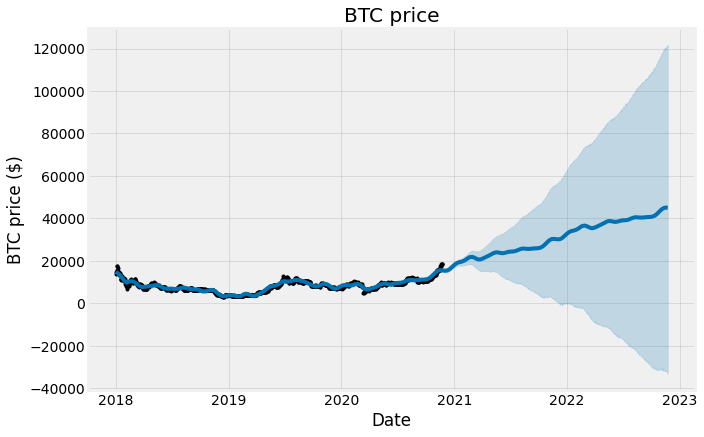

In [26]:
price_prophet.plot(price_forecast, xlabel = 'Date', ylabel = 'BTC price ($)')
plt.title('BTC price');

In [30]:
price_prophet.changepoints[:40]

34    2018-02-04
68    2018-03-10
101   2018-04-12
135   2018-05-16
169   2018-06-19
203   2018-07-23
237   2018-08-26
270   2018-09-28
304   2018-11-01
338   2018-12-05
372   2019-01-08
406   2019-02-11
439   2019-03-16
473   2019-04-19
507   2019-05-23
541   2019-06-26
575   2019-07-30
608   2019-09-01
642   2019-10-05
676   2019-11-08
710   2019-12-12
744   2020-01-15
777   2020-02-17
811   2020-03-22
845   2020-04-25
Name: ds, dtype: datetime64[ns]

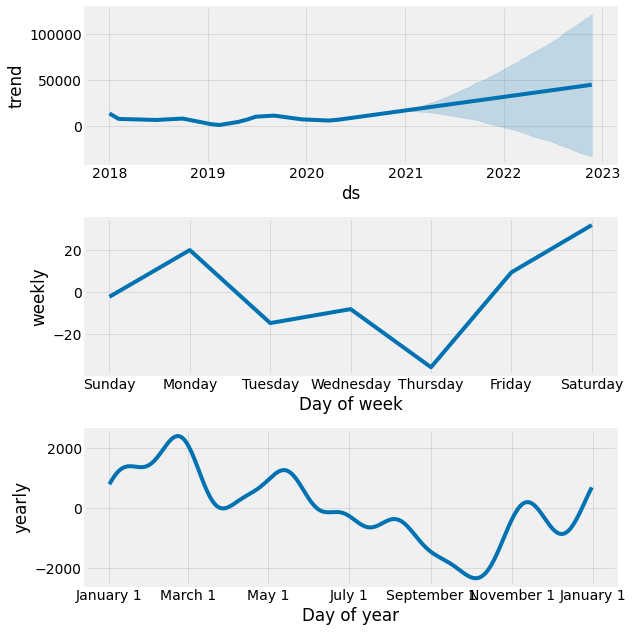

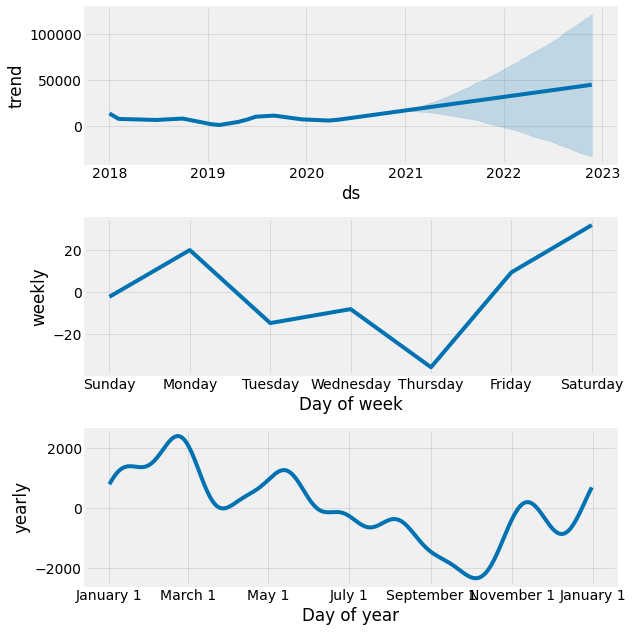

In [31]:
price_prophet.plot_components(price_forecast)

In [68]:
from fbprophet.plot import add_changepoints_to_plot


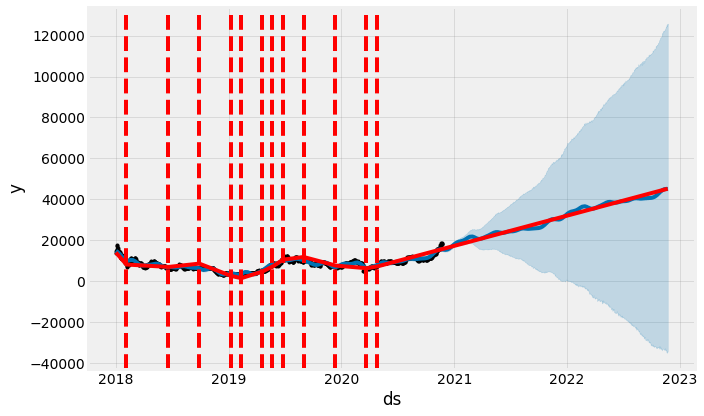

In [70]:
# Plotting the changing points
fig = price_prophet.plot(price_forecast)
a = add_changepoints_to_plot(fig.gca(), price_prophet, price_forecast)

## Start from here

In [255]:
# Make the prophet model and fit on the data
m = 0.1  #changepoint_prior_scale, by default 0.05. Increasing it will make the trend more flexible:
n = 0.9 # changepoint_range, % of past data having the change points, by default it is 80%

price_prophet = Prophet(changepoint_prior_scale=m, changepoint_range=n)
price_prophet.fit(price)

# Make a future dataframe for n years
n = 1 # number of years

price_future = price_prophet.make_future_dataframe(periods=365 * n, freq='D')


# Make predictions
price_forecast = price_prophet.predict(price_future)



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


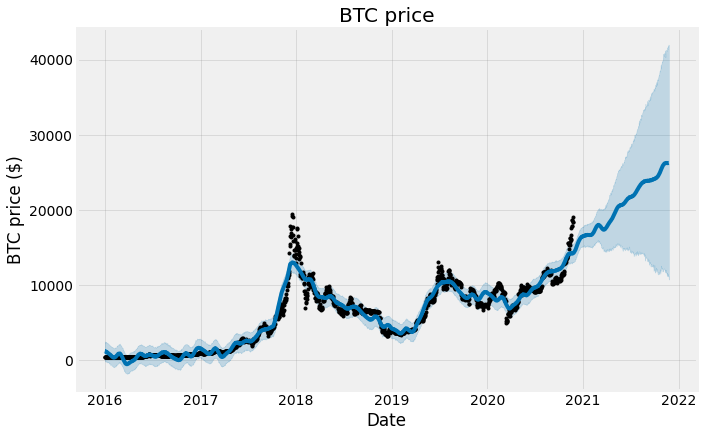

In [105]:
# plotting the forecast
price_prophet.plot(price_forecast, xlabel = 'Date', ylabel = 'BTC price ($)')
plt.title('BTC price');
# light bule: uncertainity


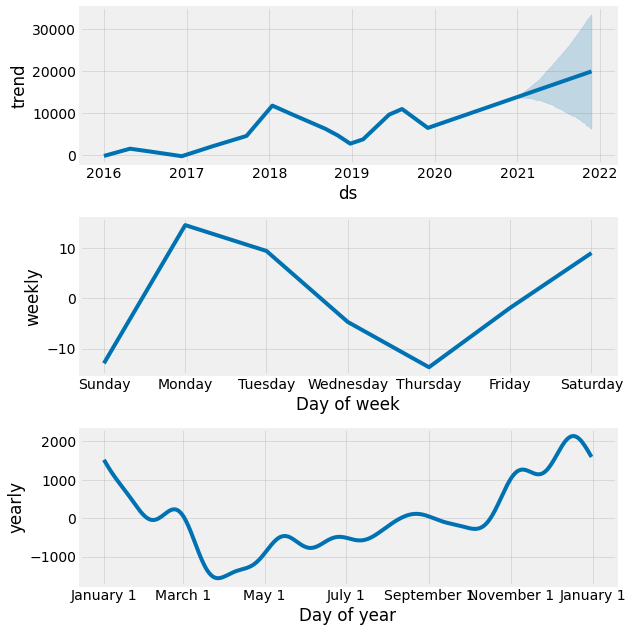

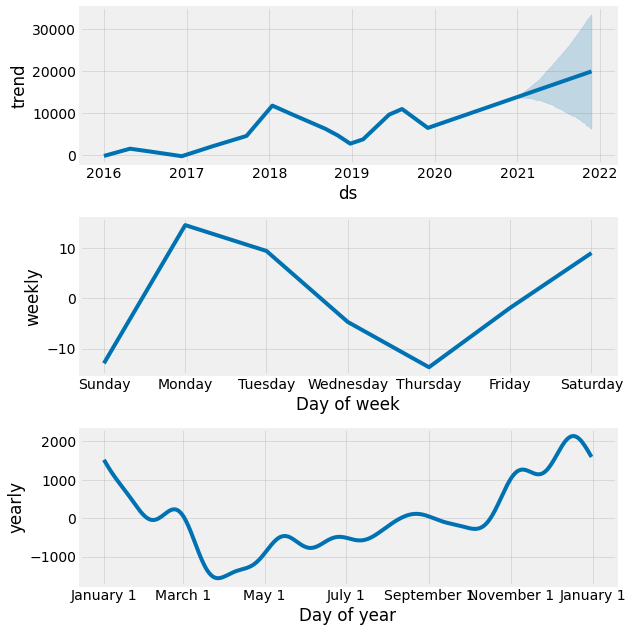

In [102]:
# plotting by components
price_prophet.plot_components(price_forecast)

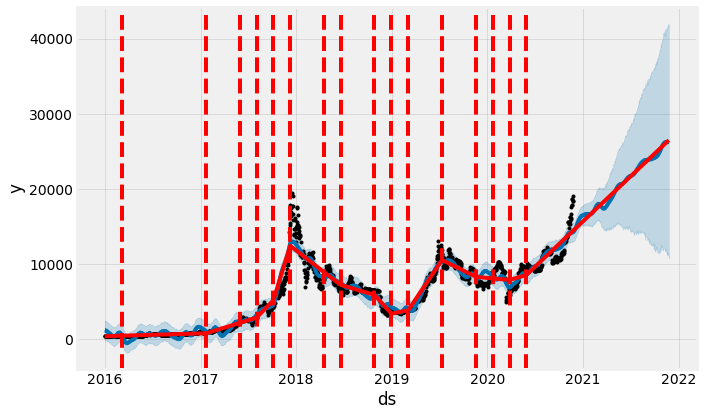

In [106]:
# plotting the changing points
fig = price_prophet.plot(price_forecast)
a = add_changepoints_to_plot(fig.gca(), price_prophet, price_forecast)

In [111]:
price_prophet.changepoints  # by default it is 25

64     2016-03-05
129    2016-05-09
193    2016-07-12
258    2016-09-15
322    2016-11-18
386    2017-01-21
451    2017-03-27
515    2017-05-30
580    2017-08-03
644    2017-10-06
708    2017-12-09
773    2018-02-12
837    2018-04-17
902    2018-06-21
966    2018-08-24
1030   2018-10-27
1095   2018-12-31
1159   2019-03-05
1224   2019-05-09
1288   2019-07-12
1352   2019-09-14
1417   2019-11-18
1481   2020-01-21
1546   2020-03-26
1610   2020-05-29
Name: ds, dtype: datetime64[ns]

In [112]:
price_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,375.133525,-60.501509,2416.722342,375.133525,375.133525,812.626578,812.626578,812.626578,-1.640478,-1.640478,-1.640478,814.267056,814.267056,814.267056,0.0,0.0,0.0,1187.760103
1,2016-01-02,376.322489,37.857336,2456.687142,376.322489,376.322489,803.542095,803.542095,803.542095,9.047863,9.047863,9.047863,794.494232,794.494232,794.494232,0.0,0.0,0.0,1179.864584
2,2016-01-03,377.511452,-83.512567,2406.264399,377.511452,377.511452,761.329971,761.329971,761.329971,-12.659163,-12.659163,-12.659163,773.989133,773.989133,773.989133,0.0,0.0,0.0,1138.841423
3,2016-01-04,378.700416,-91.212551,2433.951552,378.700416,378.700416,767.634298,767.634298,767.634298,14.604980,14.604980,14.604980,753.029319,753.029319,753.029319,0.0,0.0,0.0,1146.334715
4,2016-01-05,379.889380,-132.046426,2306.411464,379.889380,379.889380,741.345424,741.345424,741.345424,9.518410,9.518410,9.518410,731.827014,731.827014,731.827014,0.0,0.0,0.0,1121.234804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,2021-11-20,26353.363418,11884.536331,41655.089941,11630.151395,41776.993457,-113.449801,-113.449801,-113.449801,9.047863,9.047863,9.047863,-122.497664,-122.497664,-122.497664,0.0,0.0,0.0,26239.913617
2151,2021-11-21,26386.353308,11863.905482,41310.320072,11642.799927,41951.307124,-163.889049,-163.889049,-163.889049,-12.659163,-12.659163,-12.659163,-151.229886,-151.229886,-151.229886,0.0,0.0,0.0,26222.464259
2152,2021-11-22,26419.343197,11390.543549,42042.097576,11627.074788,42125.620792,-160.994670,-160.994670,-160.994670,14.604980,14.604980,14.604980,-175.599650,-175.599650,-175.599650,0.0,0.0,0.0,26258.348528
2153,2021-11-23,26452.333087,11371.562917,41765.804993,11578.078021,42299.934459,-185.329617,-185.329617,-185.329617,9.518410,9.518410,9.518410,-194.848027,-194.848027,-194.848027,0.0,0.0,0.0,26267.003470


In [234]:
# Make the prophet model and fit on the data
m = 0.1  #changepoint_prior_scale, by default 0.05. Increasing it will make the trend more flexible:
n = 0.8 # changepoint_range, % of past data having the change points, by default it is 80%

price_prophet = Prophet(changepoint_prior_scale=m, changepoint_range=n)
price_prophet.fit(price)

# Make a future dataframe for n years
t = 1 # number of years

price_future = price_prophet.make_future_dataframe(periods=365 * t, freq='D')


# Make predictions
price_forecast = price_prophet.predict(price_future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


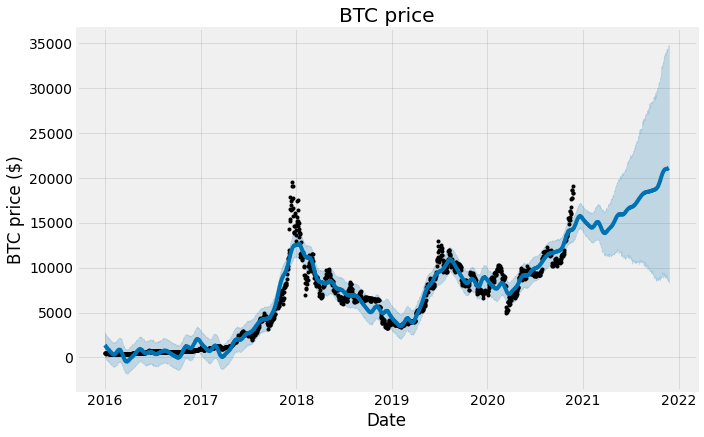

In [235]:
# plotting the forecast
price_prophet.plot(price_forecast, xlabel = 'Date', ylabel = 'BTC price ($)')
plt.title('BTC price');
# light bule: uncertainity

Diagnosis

In [128]:
from fbprophet.diagnostics import cross_validation

In [210]:
df_cv = cross_validation(price_prophet, initial='544 days', period='90 days', horizon = '180 days')

INFO:fbprophet:Making 12 forecasts with cutoffs between 2017-09-11 00:00:00 and 2020-05-28 00:00:00


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

# HUF Forecast

In [114]:
huf = pd.read_csv("/Users/macbook/Documents/Ironhack/Week5/Project/bitcoin/glassnode-api-python-client-old/data/HUFUSD=X_v2.csv")

In [115]:
huf = huf[["Date", "Close"]]
# Rename columns
huf = huf.rename(columns={'Date': 'ds', 'Close': 'y'})

In [256]:
# Make the prophet model and fit on the data
m = 0.1  #changepoint_prior_scale, by default 0.05. Increasing it will make the trend more flexible:
n = 0.8 # changepoint_range, % of past data having the change points, by default it is 80%

huf_prophet = Prophet(changepoint_prior_scale=m, changepoint_range=n)
huf_prophet.fit(huf)

# Make a future dataframe for n years
t = 1 # number of years

huf_future = huf_prophet.make_future_dataframe(periods=365 * t, freq='D')


# Make predictions
huf_forecast = huf_prophet.predict(huf_future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


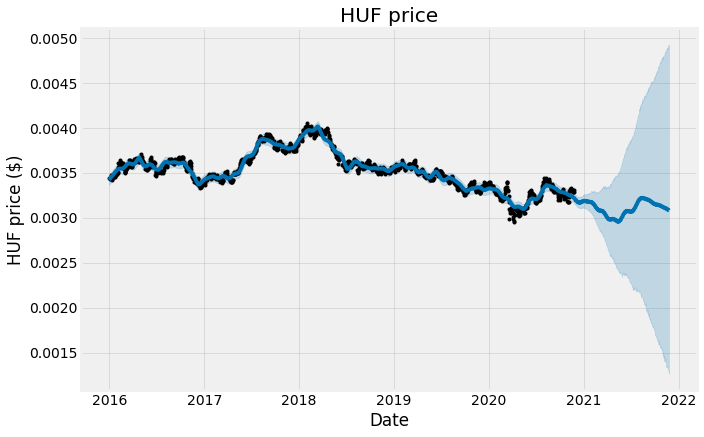

In [270]:
# plotting the forecast
huf_prophet.plot(huf_forecast, xlabel = 'Date', ylabel = 'HUF price ($)')
plt.title('HUF price');
# light bule: uncertainity

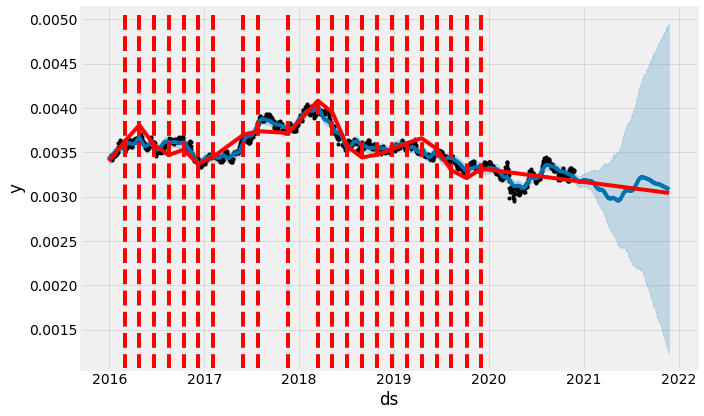

In [121]:
# plotting the changing points
fig = huf_prophet.plot(huf_forecast)
a = add_changepoints_to_plot(fig.gca(), huf_prophet,huf_forecast)

In [224]:
len(huf_prophet.changepoints )

25

In [238]:
# Make the prophet model and fit on the data
m = 0.1  #changepoint_prior_scale, by default 0.05. Increasing it will make the trend more flexible:
n = 0.9 # changepoint_range, % of past data having the change points, by default it is 80%

huf_prophet = Prophet(changepoint_prior_scale=m, changepoint_range=n)
huf_prophet.fit(huf)

# Make a future dataframe for n years
t = 1 # number of years

huf_future = huf_prophet.make_future_dataframe(periods=365 * t, freq='D')


# Make predictions
huf_forecast = huf_prophet.predict(huf_future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


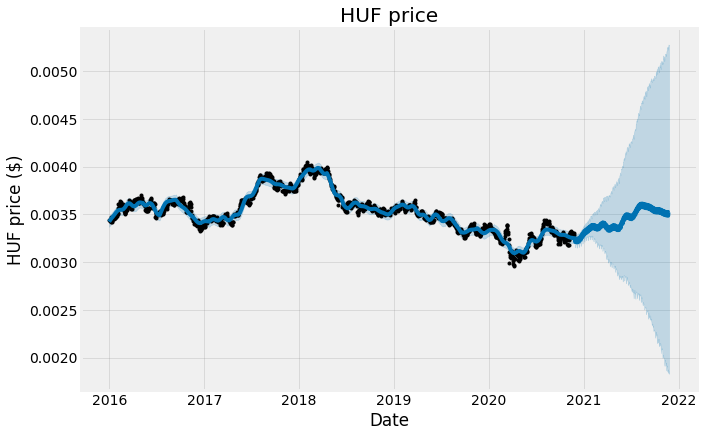

In [239]:
# plotting the forecast
huf_prophet.plot(huf_forecast, xlabel = 'Date', ylabel = 'HUF price ($)')
plt.title('HUF price');
# light bule: uncertainity

In [283]:
huf_forecast[huf_forecast["ds"] == "2021-11-23"]["yhat"]

1641    0.003084
Name: yhat, dtype: float64

In [272]:
huf[huf["ds"] == "2020-11-23"]["y"]

1276    0.003304
Name: y, dtype: float64

In [273]:
# if i have 5.000.000 huf, what could happen?

invest = 2260000

date_check = "2020-11-23"
date_year = "2021-11-23"

huf_now = huf[huf["ds"] == date_check]["y"]
huf_year = huf_forecast[huf_forecast["ds"] == date_year]["yhat"]
huf_good = huf_forecast[huf_forecast["ds"] == date_year]["yhat_upper"]
huf_bad = huf_forecast[huf_forecast["ds"] == date_year]["yhat_lower"]


inv_huf_now = np.array(huf_now * invest)
inv_huf_year = np.array(huf_year * invest)
inv_huf_good = np.array(huf_good * invest)
inv_huf_bad = np.array(huf_bad * invest)


In [274]:
btc_now = price[price["ds"] == date_check]["y"]
btc_year = price_forecast[price_forecast["ds"] == date_year]["yhat"]
btc_good = price_forecast[price_forecast["ds"] == date_year]["yhat_upper"]
btc_bad = price_forecast[price_forecast["ds"] == date_year]["yhat_lower"]

buy = np.array(inv_huf_now) / np.array(btc_now)

inv_btc_year = np.array(btc_year * buy)
inv_btc_good = np.array(btc_good * buy)
inv_btc_bad = np.array(btc_bad * buy)

In [300]:
options_huf={"Now" : inv_huf_now,
             "Avg" : inv_huf_year,
             "Good" : inv_huf_good,
             "Bad" : inv_huf_bad
    }

In [301]:
options_btc = {"Now" : inv_huf_now,
             "Avg" : inv_btc_year,
             "Good" : inv_btc_good,
             "Bad" : inv_btc_bad
}

In [302]:
options_huf = pd.DataFrame(options_huf)

In [303]:
options_btc = pd.DataFrame(options_btc)

In [304]:
df = [options_huf, options_btc]

In [305]:
options = pd.concat(df)

In [306]:
options

,Now,Avg,Good,Bad
0,7467.04,6970.934069,11124.621999,2916.477880
0,7467.04,10680.433035,17518.165967,4284.494409


In [307]:
options["Options"] = ["Stay", "Change"]

In [308]:
options

,Now,Avg,Good,Bad,Options
0,7467.04,6970.934069,11124.621999,2916.477880,Stay
0,7467.04,10680.433035,17518.165967,4284.494409,Change


In [267]:
options = options[['Options', 'Now', 'Avg', 'Good', 'Bad']]

In [268]:
options.reset_index(drop=True, inplace=True)

In [269]:
options

,Options,Now,Avg,Good,Bad
0,Stay,7467.04,6970.934069,11124.621999,2916.477880
1,Change,7467.04,10680.433035,17518.165967,4284.494409


In [227]:
price_array = np.array(price['y'])

In [230]:
huf_array = np.array(huf['y'])